In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [13]:
agg_regiao = pd.read_csv('/content/drive/MyDrive/E-commerce/agg_regiao_entrega_csv/part-00000-4052dc42-0cb1-4c2a-8c89-739c13a98180-c000.csv')
df_analise_regional = pd.read_csv('/content/drive/MyDrive/E-commerce/df_analise_regional_csv/part-00000-54d7f555-aad4-4b62-934e-0b16bf58e45e-c000.csv')

In [32]:
total_pedidos = df_analise_regional['order_id'].nunique()
total_pedidos

97587

In [33]:
kpi_status = (
   df_analise_regional['delivery_status']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)
kpi_status

,proportion
delivery_status,
Adiantado,90.84
Atrasado,6.70
No dia,2.47


In [36]:
atraso_medio = df_analise_regional.loc[
    df_analise_regional['dias_diferenca_entrega'] > 0,
    'dias_diferenca_entrega'
].mean().round(2)

print(f'O atraso médio é de {atraso_medio} dias.')
#

O atraso médio é de 10.62 dias.


In [38]:
mediana_atraso = df_analise_regional.loc[
    df_analise_regional['dias_diferenca_entrega'] > 0,
    'dias_diferenca_entrega'
].median()


In [39]:
kpi_regiao = (
   df_analise_regional.groupby('region')
    .agg(
        total_pedidos=('order_id', 'count'),
        atraso_medio=('dias_diferenca_entrega', 'mean'),
        pct_atraso=('delivery_status',
                     lambda x: (x == 'Atrasado').mean() * 100)
    )
    .reset_index()
    .round(2)
)

kpi_regiao

,region,total_pedidos,atraso_medio,pct_atraso
0,Centro-Oeste,5702,-12.34,6.44
1,Nordeste,8511,-11.49,12.04
2,Norte,1825,-15.61,8.44
3,Outros,734,-9.57,17.03
4,Sudeste,66907,-11.56,6.05
5,Sul,13908,-13.08,5.86


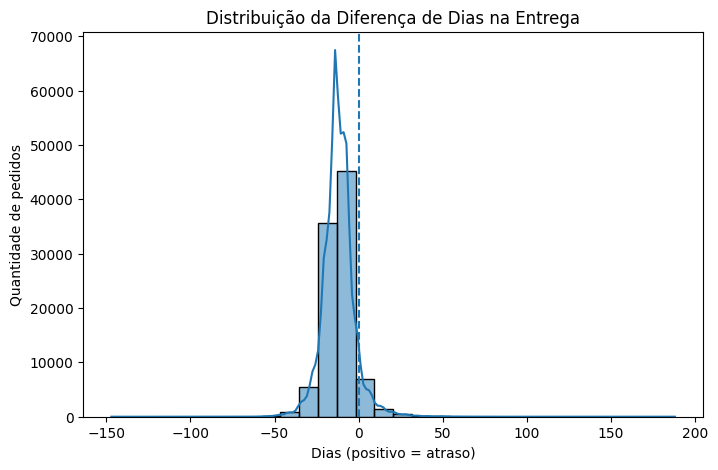

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df_analise_regional['dias_diferenca_entrega'], bins=30, kde=True)
plt.axvline(0, linestyle='--')
plt.title('Distribuição da Diferença de Dias na Entrega')
plt.xlabel('Dias (positivo = atraso)')
plt.ylabel('Quantidade de pedidos')
plt.show()

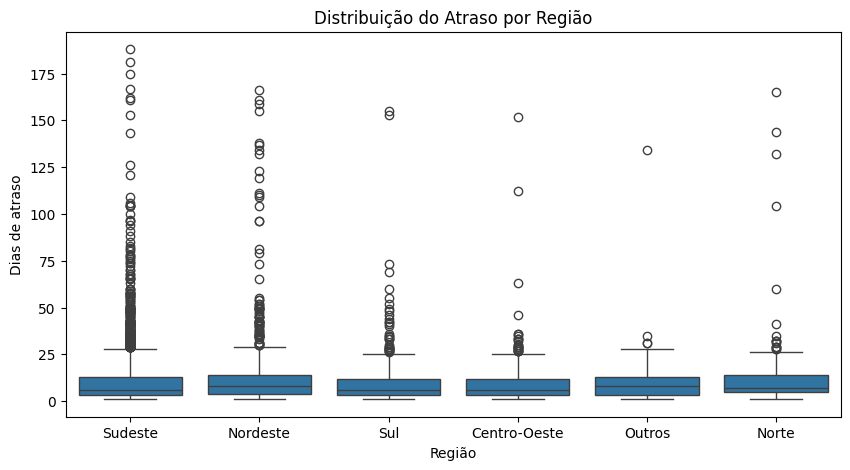

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_analise_regional[df_analise_regional['dias_diferenca_entrega'] > 0],
    x='region',
    y='dias_diferenca_entrega'
)
plt.title('Distribuição do Atraso por Região')
plt.xlabel('Região')
plt.ylabel('Dias de atraso')
plt.show()

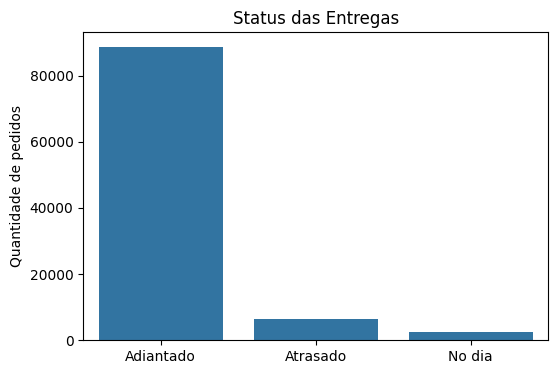

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_analise_regional, x='delivery_status')
plt.title('Status das Entregas')
plt.xlabel('')
plt.ylabel('Quantidade de pedidos')
plt.show()

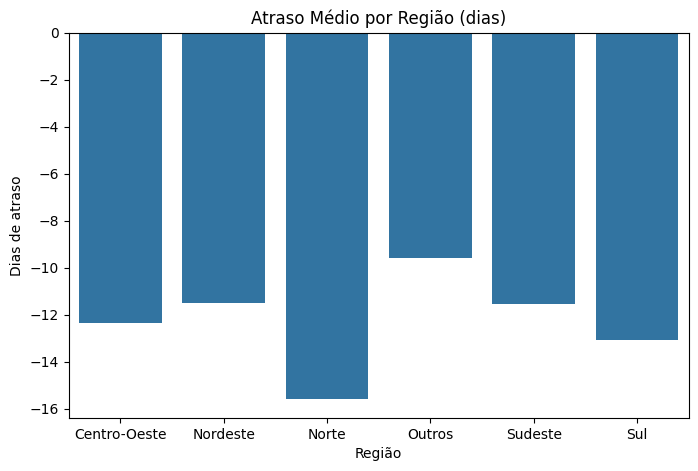

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(data=kpi_regiao, x='region', y='atraso_medio')
plt.title('Atraso Médio por Região (dias)')
plt.xlabel('Região')
plt.ylabel('Dias de atraso')
plt.show()

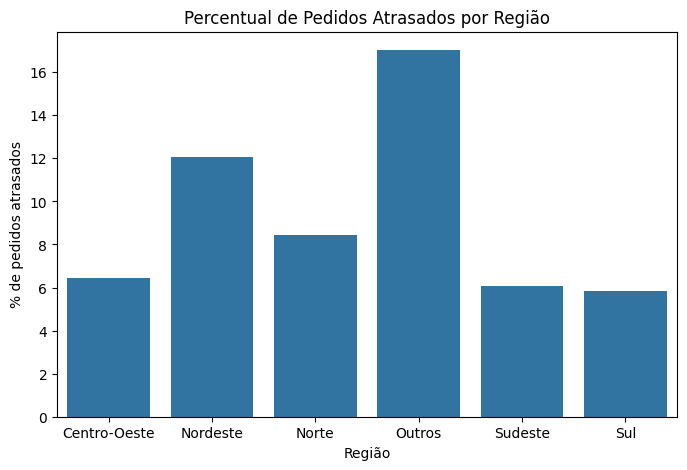

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=kpi_regiao, x='region', y='pct_atraso')
plt.title('Percentual de Pedidos Atrasados por Região')
plt.xlabel('Região')
plt.ylabel('% de pedidos atrasados')
plt.show()

## 4. Relatório de Insights

Nesta seção, conectamos os resultados quantitativos da análise com decisões de negócio.
Os resultados devem ser interpretados considerando que a análise é focada em eficiência logística.

## KPIs gerais

- Total de pedidos analisados: 112,650  
- Pedidos no prazo: 93.42%  
- Pedidos atrasados: 6.58%  
- Atraso médio (pedidos atrasados): 10.21 dias  
- Mediana do atraso: 7.00 dias  

## Principais Insights (com números)

- A operação logística apresenta boa eficiência geral, com 93.42% dos pedidos entregues dentro do prazo, porém 6.58% ainda sofrem atraso.
- Os atrasos possuem alta gravidade, com atraso médio de 10.21 dias, indicando que não se tratam apenas de desvios pontuais.
- Existe desigualdade regional no desempenho logístico:
  - Maior atraso médio regional: 15.34 dias  
  - Menor atraso médio regional: 7.82 dias
- O percentual de pedidos atrasados varia significativamente entre regiões, indo de 4.10% até 9.27%.
- A alta variabilidade dos atrasos indica risco operacional, com presença de pedidos muito acima do prazo estimado.

## Conclusão

A análise exploratória demonstra que, mesmo com alta taxa de entregas no prazo, os atrasos existentes apresentam gravidade e variabilidade relevantes, especialmente em determinadas regiões.
